In [1]:
#PROJECT 
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [2]:
#read in train and test files
train = pd.read_csv("bike-sharing-demand/train.csv")
test = pd.read_csv("bike-sharing-demand/test.csv")

#view data
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
train.describe() #view extra data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [4]:
train.isnull().sum() #check for nulls (data imputation)

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [5]:
train.dtypes #checking type of each field

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [6]:
#will show means of different weather info such as temp and humidity
weather_info = train.groupby(['season'], as_index = False).weather.mean() #find mean of weather in all seasons
weather_info['temp'] = train.groupby(['season'], as_index = False).temp.mean().temp#find mean of humidity in all seasons
weather_info['humidity'] = train.groupby(['season'], as_index = False).humidity.mean().humidity#find mean of humidity in all seasons
weather_info

,season,weather,temp,humidity
0,1,1.424423,12.530491,56.297841
1,2,1.422978,22.823483,60.852909
2,3,1.366630,28.789111,64.123674
3,4,1.459766,16.649239,66.173738


In [7]:
users = train.groupby(['season'], as_index=False).registered.sum() #how many registered users per season
users['casual'] = train.groupby(['season'], as_index=False).casual.sum().casual #how many casual users per season
users

,season,registered,casual
0,1,270893,41605
1,2,458610,129672
2,3,497944,142718
3,4,465894,78140


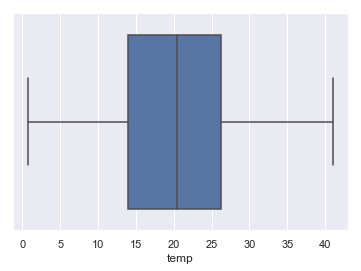

In [8]:
sns.boxplot(x = train["temp"]) #view temperature variation as a boxplot

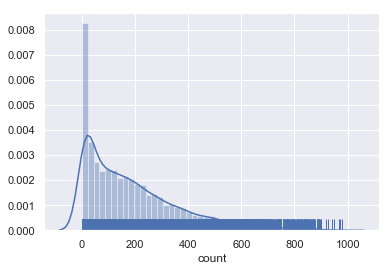

In [9]:
sns.distplot(train['count'], rug = True, kde = True, hist = True) #view count distribution

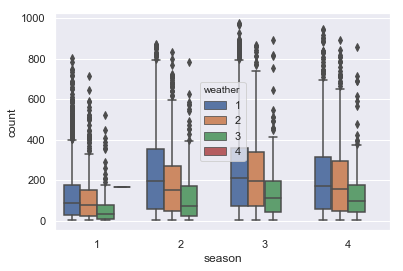

In [10]:
sns.boxplot(x="season", y="count", hue="weather", data = train) #view count by the weather and season

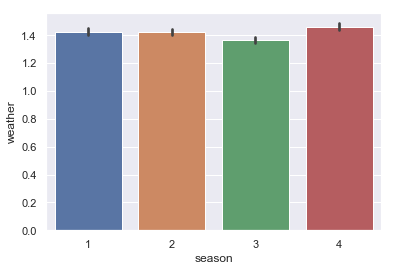

In [11]:
sns.barplot(x="season", y="weather", data=train) #weather mean by season

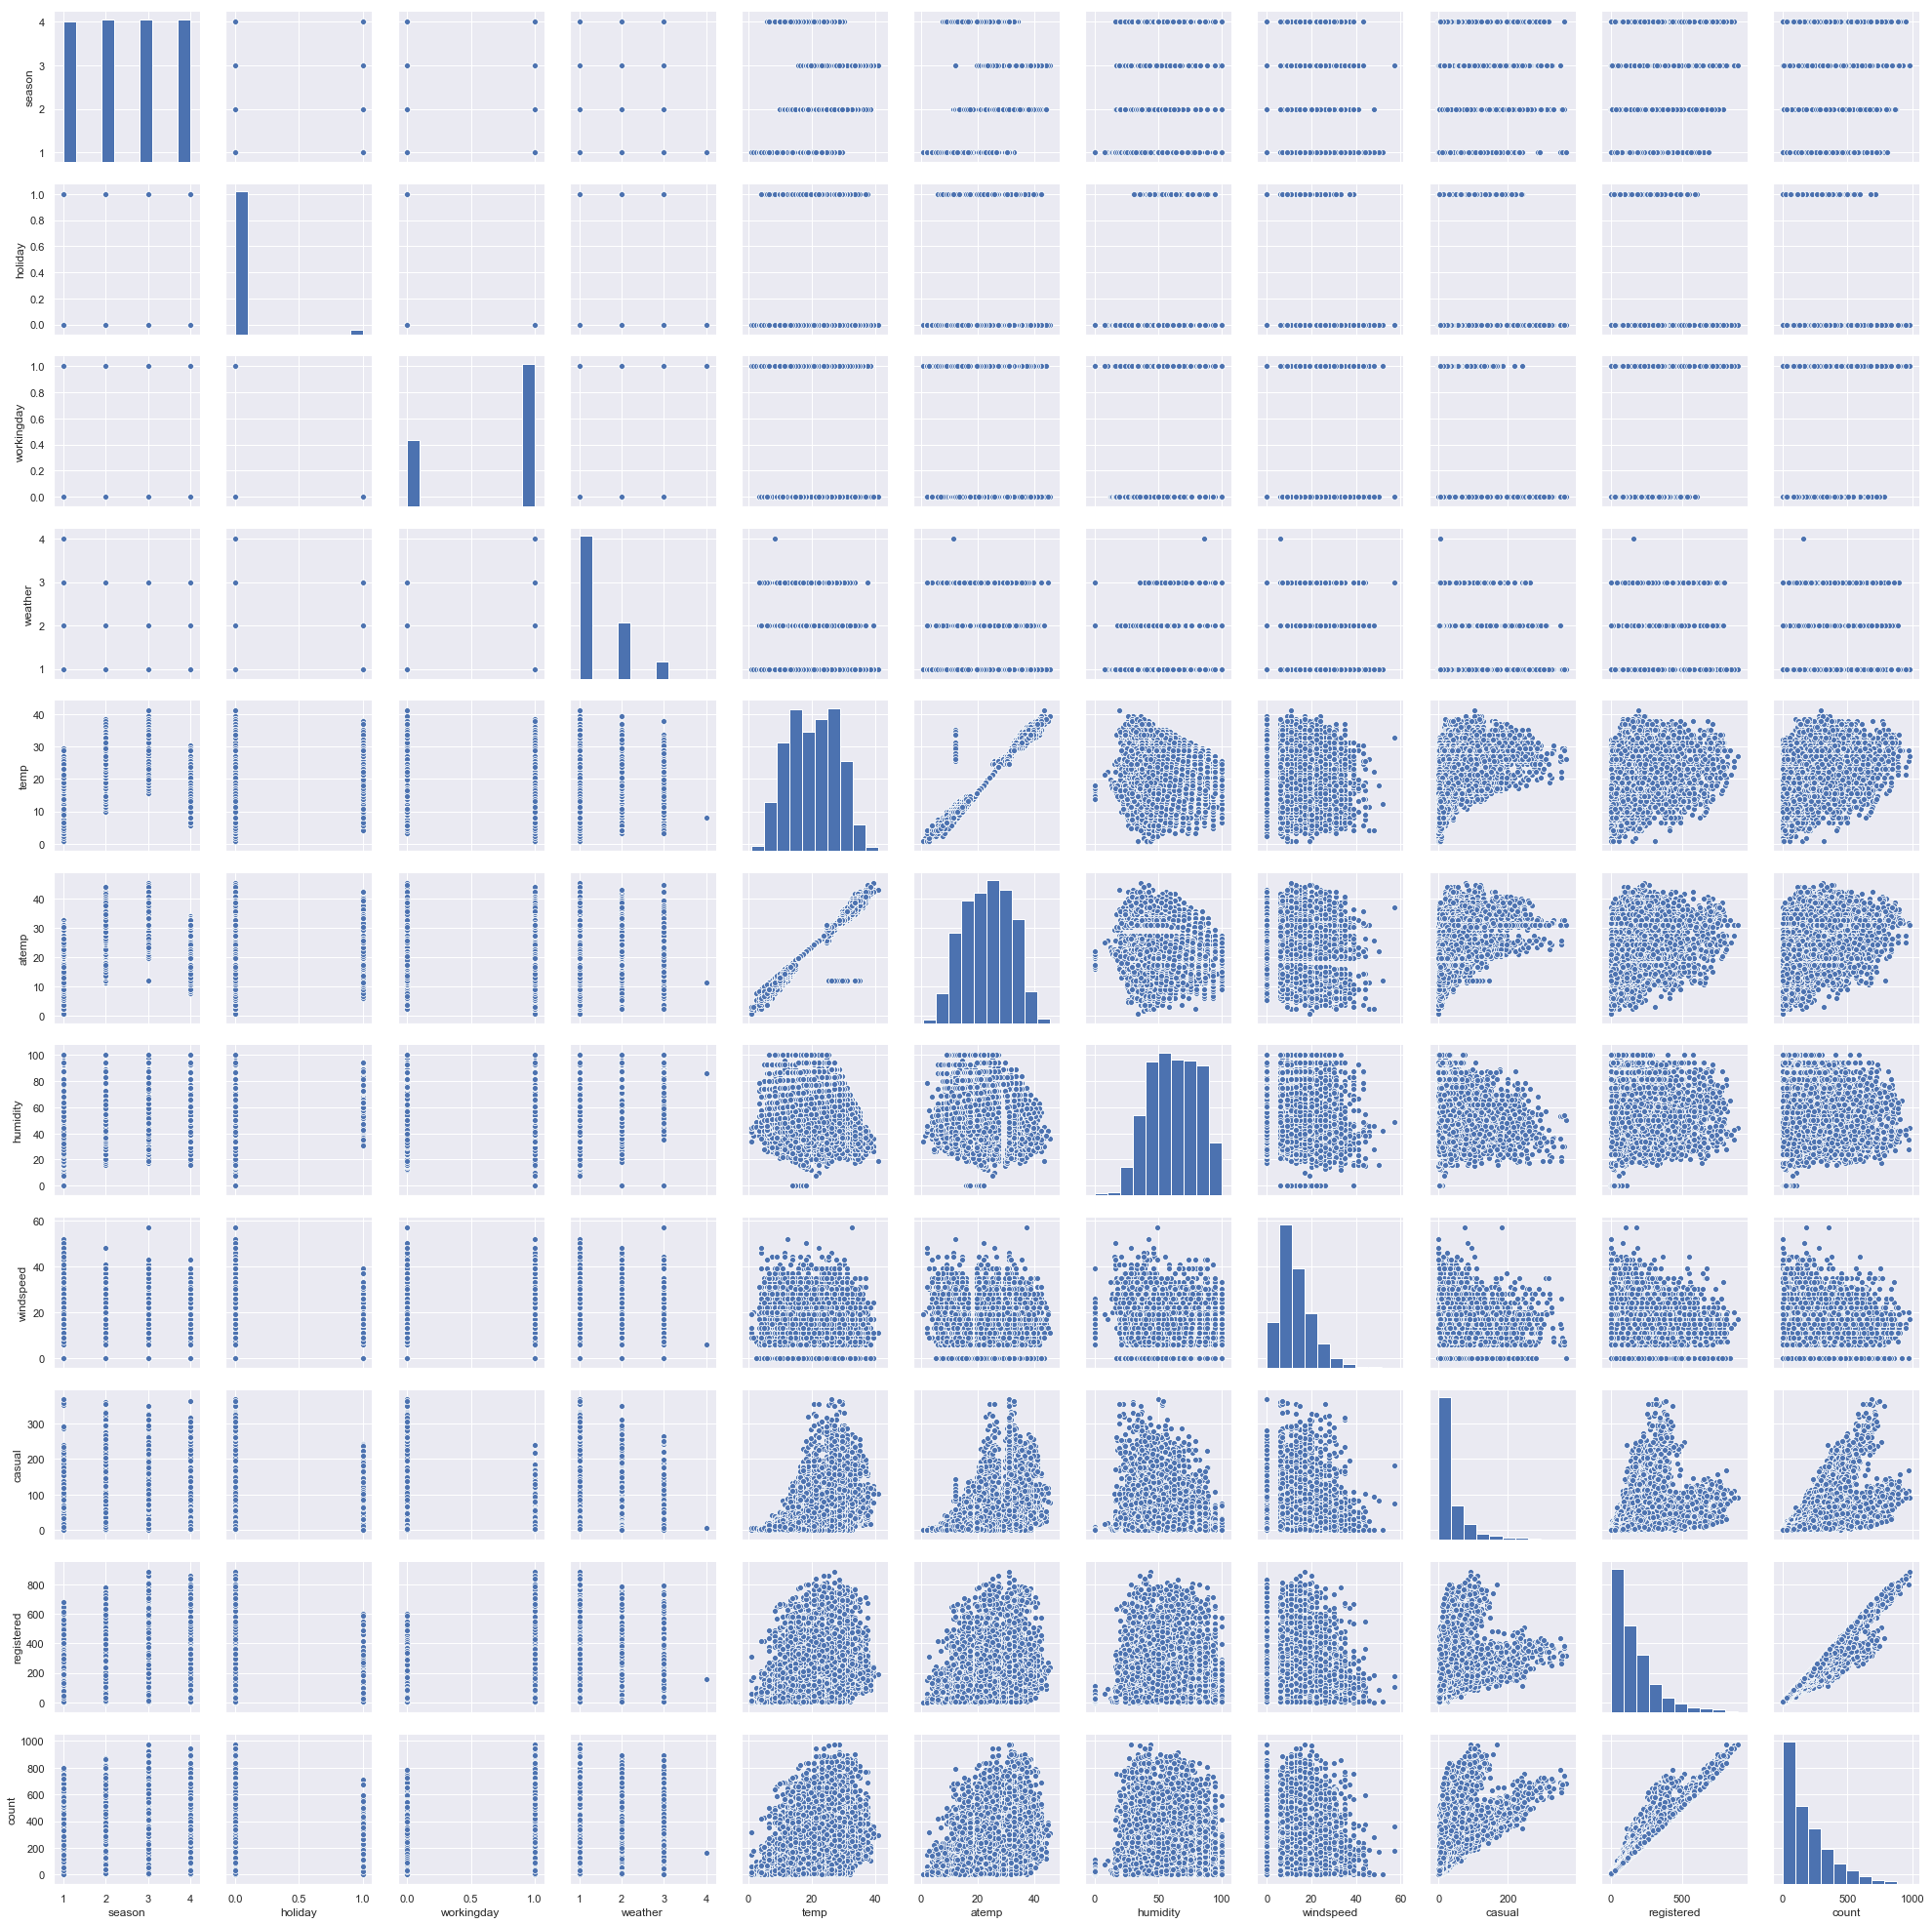

In [12]:
sns.pairplot(train)

In [13]:
#sns.swarmplot(x="season", y="registered", hue="weather", data=train) #swarmplot view registered by weather and season

In [14]:
#sns.boxplot(x = train['count']) #view count and its outliers

In [15]:
#sns.violinplot(x = "season", y = "count", hue="weather", data = train) 

In [16]:
#sns.catplot(x='workingday',data=train,kind='count')

In [17]:
#Feature Engineering
df_train = train.copy()
df_test = test.copy()

#season dummies 1,2,3,4 for test and train
season = pd.get_dummies(df_train['season'], prefix='season')
df_train = pd.concat([df_train, season], axis = 1)

season = pd.get_dummies(df_test['season'], prefix='season')
df_test = pd.concat([df_test, season], axis = 1)


df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0


In [18]:
#get weather dummies 1,2,3,4
weather = pd.get_dummies(df_train['weather'], prefix='weather')
df_train = pd.concat([df_train, weather], axis = 1)

weather = pd.get_dummies(df_test['weather'], prefix='weather')
df_test = pd.concat([df_test, weather], axis = 1)


df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0


In [19]:
#dropping the unecessary fields
df_train.drop(['season', 'weather'], inplace = True, axis = 1)
df_test.drop(['season', 'weather'], inplace = True, axis = 1)
df_test.head()


,datetime,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-20 00:00:00,0,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0


In [20]:
#splitting the date time column using time-series data

df_train['datetime'] = pd.to_datetime(df_train.datetime, format = '%Y-%m-%d %H:%M')
df_test['datetime'] = pd.to_datetime(df_test.datetime, format = '%Y-%m-%d %H:%M')


for df in (df_train, df_test):
    df['year'] = df.datetime.dt.year
    df['month'] = df.datetime.dt.month
    df['day'] = df.datetime.dt.day
    df['hour'] = df.datetime.dt.hour

df_train.drop(['datetime'], inplace = True, axis = 1)
#df_test.drop(['datetime'], inplace = True, axis = 1)
df_train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_1,...,season_3,season_4,weather_1,weather_2,weather_3,weather_4,year,month,day,hour
0,0,0,9.84,14.395,81,0.0,3,13,16,1,...,0,0,1,0,0,0,2011,1,1,0
1,0,0,9.02,13.635,80,0.0,8,32,40,1,...,0,0,1,0,0,0,2011,1,1,1
2,0,0,9.02,13.635,80,0.0,5,27,32,1,...,0,0,1,0,0,0,2011,1,1,2
3,0,0,9.84,14.395,75,0.0,3,10,13,1,...,0,0,1,0,0,0,2011,1,1,3
4,0,0,9.84,14.395,75,0.0,0,1,1,1,...,0,0,1,0,0,0,2011,1,1,4


In [21]:
df_train.drop(['casual','registered'],axis=1,inplace=True)
df_train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,year,month,day,hour
0,0,0,9.84,14.395,81,0.0,16,1,0,0,0,1,0,0,0,2011,1,1,0
1,0,0,9.02,13.635,80,0.0,40,1,0,0,0,1,0,0,0,2011,1,1,1
2,0,0,9.02,13.635,80,0.0,32,1,0,0,0,1,0,0,0,2011,1,1,2
3,0,0,9.84,14.395,75,0.0,13,1,0,0,0,1,0,0,0,2011,1,1,3
4,0,0,9.84,14.395,75,0.0,1,1,0,0,0,1,0,0,0,2011,1,1,4


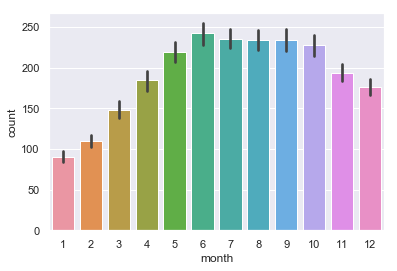

In [22]:
sns.barplot(x='month', y = 'count', data=df_train) #see count by month

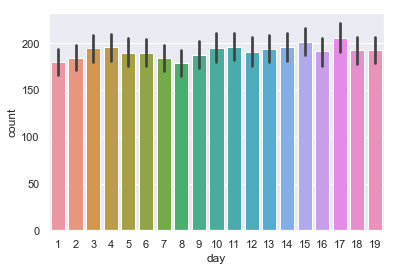

In [23]:
sns.barplot(x='day', y = 'count', data=df_train) #count by day

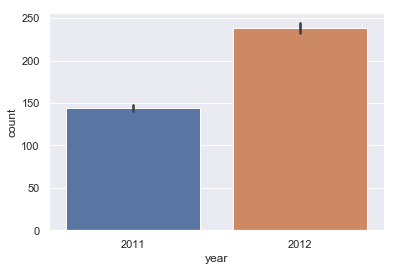

In [24]:
sns.barplot(x='year', y = 'count', data=df_train) #see count by year

In [25]:
#MODELING SECTION
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB as GNB

from sklearn.ensemble import RandomForestRegressor as RandomForest
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor as DecisionTree
from sklearn.linear_model import LogisticRegression as LR
#from sklearn.linear_model import LinearRegression
from sklearn import metrics


import math as m

#view shape of train data
X = df_train.drop('count', axis = 1)
print(X.shape)
y = df_train['count']
print(y.shape)

(10886, 18)
(10886,)


In [26]:
#splitting the data
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = .8, test_size = .2, random_state = 100)

#models being used
model_classifier_list = {"KNearestNeighbors": KNN(), "RandomForest": RandomForest(),
"SVM": SVR(), "DecisionTree": DecisionTree(), "LogisticRegression": LR()}
models_list = []
rsmle_list = []

#each model will go through the same modeling techniques to get RSMLE score
#create the classifier, fit the model, predict the model and then calculate score
for key, value in model_classifier_list.items():
    classifier = value
    classifier.fit(train_X, train_y)
    model_predict = classifier.predict(test_X)
    rsmle_score = m.sqrt(metrics.mean_squared_log_error(model_predict, test_y))
    models_list.append(key)
    rsmle_list.append(rsmle_score)

print(models_list)
print(rsmle_list)


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


['KNearestNeighbors', 'RandomForest', 'SVM', 'DecisionTree', 'LogisticRegression']
[0.9781304514559944, 0.36663082954599974, 1.4953744480149767, 0.45231585529479673, 1.567443938811156]


In [27]:
#print scores
for i in range(len(models_list)):
	print("Model: {}, RMSLE: {}".format(models_list[i], rsmle_list[i]))

Model: KNearestNeighbors, RMSLE: 0.9781304514559944
Model: RandomForest, RMSLE: 0.36663082954599974
Model: SVM, RMSLE: 1.4953744480149767
Model: DecisionTree, RMSLE: 0.45231585529479673
Model: LogisticRegression, RMSLE: 1.567443938811156


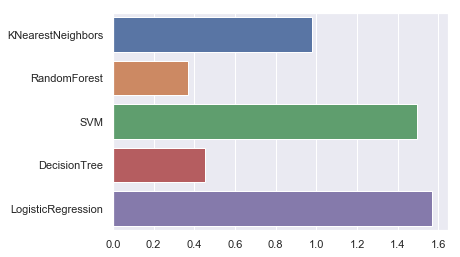

In [28]:
#do visualizations based on modeling

#view RMSLE scores as a visual
sns.barplot(x = rsmle_list, y = models_list)

In [58]:
'''
hyperparameter tuning on best model RandomForest
n_estimators changes the number of estimators, n_jobs uses all processors,
and max_features was just experimental
RSMLE score does not change much but it does reduce it
'''


classifier = RandomForest(n_estimators = 100, n_jobs = -1, max_features = None)
classifier.fit(train_X, train_y)
model_predict = classifier.predict(test_X)
rsmle_score = m.sqrt(metrics.mean_squared_log_error(model_predict, test_y))
print(rsmle_score)

0.35837730251932576


In [ ]:
#export final data to csv
def generate_submission(df, targetcol): #function to generate submission df
    submission = df
    submission.rename(columns={targetcol: 'count'}, inplace=True)
    return submission

df_submission = generate_submission(df_test, 'count') #getting df
df_submission.to_csv("submission.csv", index=False) #getting file
df_submission.head()
